In [1]:
import torch
from train_pl import AudioVisualModel
import matplotlib.pyplot as plt

CUDA is Available:  True


In [2]:
conv = torch.nn.Sequential(
    torch.nn.Conv1d(80, 512, kernel_size=(7,), stride=(1,)),
    torch.nn.ConvTranspose1d(512, 256, kernel_size=(16,), stride=(8,), padding=(4,)),
)

In [3]:
x = (torch.randn(1, 5, 10) > 0.5).to(torch.float)
x

tensor([[[1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
         [0., 0., 0., 1., 0., 0., 1., 1., 1., 1.],
         [0., 1., 0., 1., 0., 0., 1., 0., 1., 1.],
         [1., 1., 0., 1., 0., 0., 0., 0., 1., 1.]]])

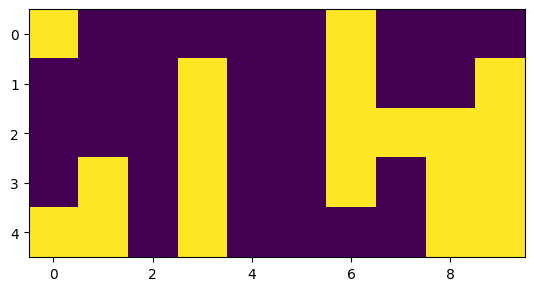

In [4]:
plt.imshow(x[0])

In [5]:
x

tensor([[[1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
         [0., 0., 0., 1., 0., 0., 1., 1., 1., 1.],
         [0., 1., 0., 1., 0., 0., 1., 0., 1., 1.],
         [1., 1., 0., 1., 0., 0., 0., 0., 1., 1.]]])

In [6]:
x = (x - x.mean(dim = [-2, -1], keepdim = True))

In [7]:
x

tensor([[[ 0.6000, -0.4000, -0.4000, -0.4000, -0.4000, -0.4000,  0.6000,
          -0.4000, -0.4000, -0.4000],
         [-0.4000, -0.4000, -0.4000,  0.6000, -0.4000, -0.4000,  0.6000,
          -0.4000, -0.4000,  0.6000],
         [-0.4000, -0.4000, -0.4000,  0.6000, -0.4000, -0.4000,  0.6000,
           0.6000,  0.6000,  0.6000],
         [-0.4000,  0.6000, -0.4000,  0.6000, -0.4000, -0.4000,  0.6000,
          -0.4000,  0.6000,  0.6000],
         [ 0.6000,  0.6000, -0.4000,  0.6000, -0.4000, -0.4000, -0.4000,
          -0.4000,  0.6000,  0.6000]]])

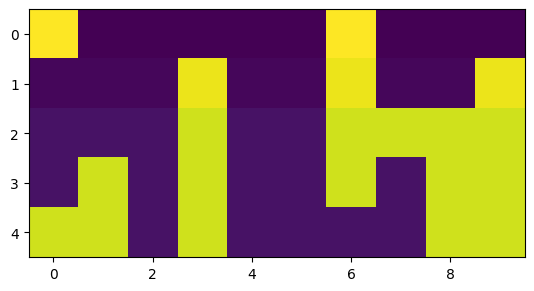

In [8]:
plt.imshow(torch.nn.functional.normalize(x, p = 2, dim = -1)[0])

In [9]:
x.shape

torch.Size([1, 5, 10])

In [10]:
torch.randn_like(x)*0.01

tensor([[[ 1.0337e-02, -1.7774e-02,  3.1875e-03, -1.0845e-04,  9.1381e-03,
          -3.0452e-03,  2.9509e-03,  2.1646e-03,  1.5520e-02,  4.8426e-05],
         [-6.2696e-03,  6.1569e-03,  5.8078e-03, -8.8344e-03,  3.2188e-03,
          -2.1797e-02,  6.5385e-04, -2.5227e-03, -1.5951e-02, -3.7704e-03],
         [ 4.2931e-03, -6.2206e-03, -1.1213e-03,  4.8493e-03, -6.2569e-03,
          -1.5522e-02,  7.1375e-05, -2.7654e-03,  2.5248e-03, -2.9947e-03],
         [-6.4834e-03, -1.0673e-02,  8.6192e-03,  8.5669e-03, -8.6186e-03,
          -3.9236e-03,  3.9149e-03,  6.2644e-03,  3.5230e-03,  1.4602e-04],
         [-1.2108e-02, -6.8251e-04, -9.2254e-04, -8.4413e-03,  1.2426e-02,
           8.0997e-03, -2.2327e-02,  7.8175e-03, -8.7298e-03,  1.5879e-02]]])

In [11]:
class ARGS:
    lr = 0.001
    batch_size= 1
    num_dataset_workers = 1
    
    audio_dataset = "SingleChannelAVSpeech"
    noise_dataset= "WHAM"
    audio_dataset_path= "/scratch/vahid/AVSpeech/"
    noise_dataset_path= ""
    n_speakers= 1
    sampling_rate= 16000
    duration= 3.0
    task='tr'
    audio_only=False
    add_noise=False
    noise_db_bounds=(0, 0)
    noise_db_bounds_test=(0, 0)
    dynamic_mixing=False
    ref_mic=0
    mic_idx=[0]
    moving_source=True
    denoise_audio = False
    
    
    n_mel_channels = 80 
    ngf = 32 
    n_residual_layers = 3
    ndf = 16 
    num_D = 3 
    n_layers_D = 4
    downsamp_factor = 4
    lambda_feat = 10
    cond_disc = True
    

m = AudioVisualModel(ARGS())

Sequential(
  (0): Generator(
    (model): Sequential(
      (0): ReflectionPad1d((3, 3))
      (1): Conv1d(80, 512, kernel_size=(7,), stride=(1,))
      (2): LeakyReLU(negative_slope=0.2)
      (3): ConvTranspose1d(512, 256, kernel_size=(16,), stride=(8,), padding=(4,))
      (4): ResnetBlock(
        (block): Sequential(
          (0): LeakyReLU(negative_slope=0.2)
          (1): ReflectionPad1d((1, 1))
          (2): Conv1d(256, 256, kernel_size=(3,), stride=(1,))
          (3): LeakyReLU(negative_slope=0.2)
          (4): Conv1d(256, 256, kernel_size=(1,), stride=(1,))
        )
        (shortcut): Conv1d(256, 256, kernel_size=(1,), stride=(1,))
      )
      (5): ResnetBlock(
        (block): Sequential(
          (0): LeakyReLU(negative_slope=0.2)
          (1): ReflectionPad1d((3, 3))
          (2): Conv1d(256, 256, kernel_size=(3,), stride=(1,), dilation=(3,))
          (3): LeakyReLU(negative_slope=0.2)
          (4): Conv1d(256, 256, kernel_size=(1,), stride=(1,))
        )
 

/scratch/vahid/melgan/mel2wav/modules.py:43: FutureWarning: Pass sr=22050, n_fft=1024, n_mels=80, fmin=0.0, fmax=None as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_basis = librosa_mel_fn(


In [25]:
d = m.train_dataset.__getitem__(11)

In [26]:
d["audio"].max(dim = -1, keepdim = True)[0]

tensor([[[0.9000]],

        [[0.9000]],

        [[0.9000]]])

In [27]:
v_t = d["video"].unsqueeze(0)
v_t.shape

torch.Size([1, 1, 75, 3, 160, 160])

In [28]:
import torchvision

In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = (img - img.min())/(img.max() - img.min()) *255
        img = F.to_pil_image(img.to(torch.uint8))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [30]:
torchvision.utils.make_grid(v_t[0, 0])

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.1373,  ..., -0.2941,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000, -1.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.1137,  ..., -0.3882,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000, -0.7098,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0

In [31]:
v_t.shape

torch.Size([1, 1, 75, 3, 160, 160])

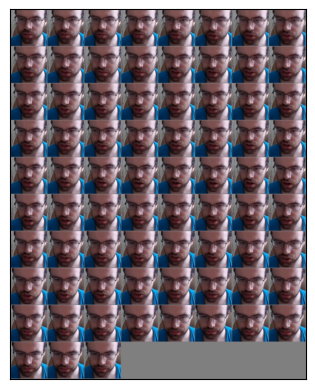

In [32]:
show(torchvision.utils.make_grid(v_t[0, 0]))

In [19]:
torchvision.utils.make_grid(v_t[0, 0]).shape

torch.Size([3, 1622, 1298])

In [20]:
raise

RuntimeError: No active exception to reraise

In [ ]:
mel = m.fft(d["audio"][0])[0]
mel.shape

torch.Size([80, 258])

In [ ]:
from librosa.filters import mel as librosa_mel_fn

class Audio2Mel(nn.Module):
    def __init__(
        self,
        n_fft=1024,
        hop_length=256,
        win_length=1024,
        sampling_rate=22050,
        n_mel_channels=80,
        mel_fmin=0.0,
        mel_fmax=None,
    ):
        
        super().__init__()
        ##############################################
        # FFT Parameters                              #
        ##############################################
        window = torch.hann_window(win_length).float()
        mel_basis = librosa_mel_fn(
            sampling_rate, n_fft, n_mel_channels, mel_fmin, mel_fmax
        )
        mel_basis = torch.from_numpy(mel_basis).float()
        self.register_buffer("mel_basis", mel_basis)
        self.register_buffer("window", window)
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.win_length = win_length
        self.sampling_rate = sampling_rate
        self.n_mel_channels = n_mel_channels
    
    def output_shape(self, L, sr = 16000, center = False):
        L = L * 220500 / sr
        return (80, int(((L  - (self.win_length - 1) - 1) / self.hop_length) + 1)) if center else L//self.hop_length

    def forward(self, audio):
        p = (self.n_fft - self.hop_length) // 2
        audio = F.pad(audio, (p, p), "reflect").squeeze(1)
        fft = torch.stft(
            audio,
            n_fft=self.n_fft,
            hop_length=self.hop_length,
            win_length=self.win_length,
            window=self.window,
            center=False,
        )
        print(fft.shape)
        real_part, imag_part = fft.unbind(-1)
        magnitude = torch.sqrt(real_part ** 2 + imag_part ** 2)
        mel_output = torch.matmul(self.mel_basis, magnitude)
        log_mel_spec = torch.log10(torch.clamp(mel_output, min=1e-5))
        
     
        return log_mel_spec


In [ ]:
self = Audio2Mel()

/tmp/ipykernel_13390/1867461462.py:20: FutureWarning: Pass sr=22050, n_fft=1024, n_mels=80, fmin=0.0, fmax=None as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_basis = librosa_mel_fn(


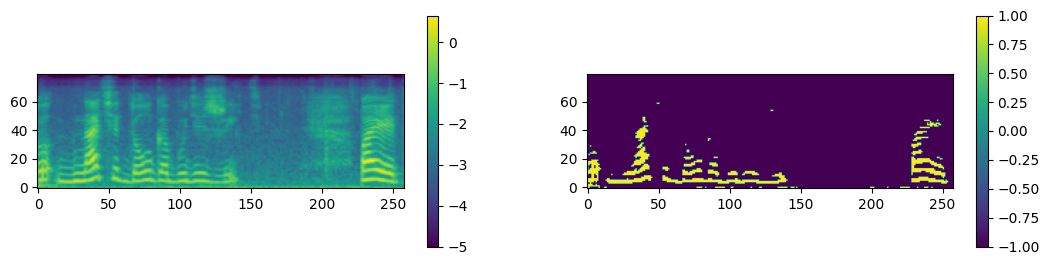

In [ ]:
fig, AX =  plt.subplots(figsize=(13, 3), ncols=2)
pos = AX[0].imshow(mel, origin = "lower")
fig.colorbar(pos, ax=AX[0])
pos = AX[1].imshow(torch.sign(mel+1), origin = "lower")
fig.colorbar(pos, ax=AX[1])

In [ ]:
d["video"].shape

torch.Size([1, 75, 3, 160, 160])

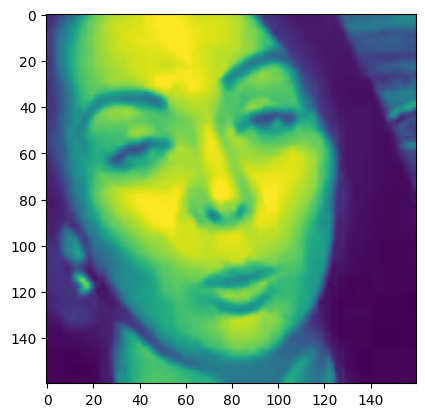

In [ ]:
plt.imshow(d["video"][0, 0, 0
                      ])

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
            transforms.Resize([112, 112]),
            transforms.Grayscale(num_output_channels=1),
            transforms.Normalize(0.5, 0.5)
        ])

In [ ]:
d["video"][0, 0].max()

tensor(1.)

In [ ]:
transform(d["video"][0]).shape

torch.Size([75, 1, 112, 112])

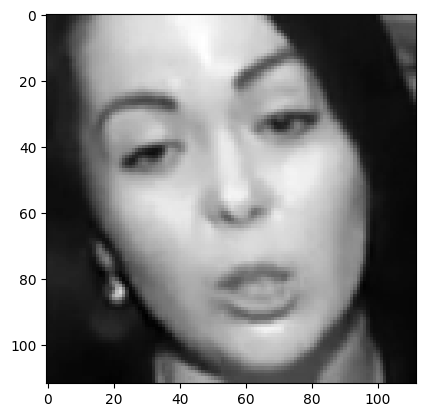

In [ ]:
plt.imshow(transform(d["video"][0])[15, 0], cmap= "gray")

# Visual-Context-Attentional-GAN

In [ ]:
import math
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F



def conv3x3(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


def downsample_basic_block(inplanes, outplanes, stride):
    return nn.Sequential(
        nn.Conv2d(inplanes, outplanes, kernel_size=1, stride=stride, bias=False),
        nn.BatchNorm2d(outplanes),
    )


def downsample_basic_block_v2(inplanes, outplanes, stride):
    return nn.Sequential(
        nn.AvgPool2d(kernel_size=stride, stride=stride, ceil_mode=True, count_include_pad=False),
        nn.Conv2d(inplanes, outplanes, kernel_size=1, stride=1, bias=False),
        nn.BatchNorm2d(outplanes),
    )


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, relu_type='relu'):
        super(BasicBlock, self).__init__()

        assert relu_type in ['relu', 'prelu']

        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)

        # type of ReLU is an input option
        if relu_type == 'relu':
            self.relu1 = nn.ReLU(inplace=True)
            self.relu2 = nn.ReLU(inplace=True)
        elif relu_type == 'prelu':
            self.relu1 = nn.PReLU(num_parameters=planes)
            self.relu2 = nn.PReLU(num_parameters=planes)
        else:
            raise Exception('relu type not implemented')
        # --------

        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)

        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu2(out)

        return out


class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, relu_type='relu', gamma_zero=False, avg_pool_downsample=False):
        self.inplanes = 64
        self.relu_type = relu_type
        self.gamma_zero = gamma_zero
        self.downsample_block = downsample_basic_block_v2 if avg_pool_downsample else downsample_basic_block

        super(ResNet, self).__init__()
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AvgPool2d(4)

        # default init
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
                # nn.init.ones_(m.weight)
                # nn.init.zeros_(m.bias)

        if self.gamma_zero:
            for m in self.modules():
                if isinstance(m, BasicBlock):
                    m.bn2.weight.data.zero_()

    def _make_layer(self, block, planes, blocks, stride=1):

        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = self.downsample_block(inplanes=self.inplanes,
                                               outplanes=planes * block.expansion,
                                               stride=stride)

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, relu_type=self.relu_type))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes, relu_type=self.relu_type))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        return x


class ResBlk1D(nn.Module):
    def __init__(self, dim_in, dim_out, actv=nn.LeakyReLU(0.2),
                 normalize=False, downsample=False):
        super().__init__()
        self.actv = actv
        self.normalize = normalize
        self.downsample = downsample
        self.learned_sc = dim_in != dim_out
        self._build_weights(dim_in, dim_out)

    def _build_weights(self, dim_in, dim_out):
        self.conv1 = nn.Conv1d(dim_in, dim_in, 5, 1, 2)
        self.conv2 = nn.Conv1d(dim_in, dim_out, 5, 1, 2)
        if self.normalize:
            self.norm1 = nn.BatchNorm1d(dim_in)
            self.norm2 = nn.BatchNorm1d(dim_in)
        if self.learned_sc:
            self.conv1x1 = nn.Conv1d(dim_in, dim_out, 1, 1, 0, bias=False)

    def _shortcut(self, x):
        if self.learned_sc:
            x = self.conv1x1(x)
        if self.downsample:
            x = F.avg_pool1d(x, 2)
        return x

    def _residual(self, x):
        if self.normalize:
            x = self.norm1(x)
        x = self.actv(x)
        x = self.conv1(x)
        if self.downsample:
            x = F.avg_pool1d(x, 2)
        if self.normalize:
            x = self.norm2(x)
        x = self.actv(x)
        x = self.conv2(x)
        return x

    def forward(self, x):
        x = self._shortcut(x) + self._residual(x)
        return x / math.sqrt(2)  # unit variance

class ResBlk(nn.Module):
    def __init__(self, dim_in, dim_out, actv=nn.LeakyReLU(0.2),
                 normalize=False, downsample=False):
        super().__init__()
        self.actv = actv
        self.normalize = normalize
        self.downsample = downsample
        self.learned_sc = dim_in != dim_out
        self._build_weights(dim_in, dim_out)

    def _build_weights(self, dim_in, dim_out):
        self.conv1 = nn.Conv2d(dim_in, dim_in, 5, 1, 2)
        self.conv2 = nn.Conv2d(dim_in, dim_out, 5, 1, 2)
        if self.normalize:
            self.norm1 = nn.BatchNorm2d(dim_in)
            self.norm2 = nn.BatchNorm2d(dim_in)
        if self.learned_sc:
            self.conv1x1 = nn.Conv2d(dim_in, dim_out, 1, 1, 0, bias=False)

    def _shortcut(self, x):
        if self.learned_sc:
            x = self.conv1x1(x)
        if self.downsample:
            x = F.avg_pool2d(x, 2)
        return x

    def _residual(self, x):
        if self.normalize:
            x = self.norm1(x)
        x = self.actv(x)
        x = self.conv1(x)
        if self.downsample:
            x = F.avg_pool2d(x, 2)
        if self.normalize:
            x = self.norm2(x)
        x = self.actv(x)
        x = self.conv2(x)
        return x

    def forward(self, x):
        x = self._shortcut(x) + self._residual(x)
        return x / math.sqrt(2)  # unit variance

class GenResBlk(nn.Module):
    def __init__(self, dim_in, dim_out, actv=nn.LeakyReLU(0.2), upsample=False):
        super().__init__()
        self.actv = actv
        self.upsample = upsample
        self.learned_sc = dim_in != dim_out
        self._build_weights(dim_in, dim_out)

    def _build_weights(self, dim_in, dim_out):
        self.conv1 = nn.Conv2d(dim_in, dim_out, 5, 1, 2)
        self.conv2 = nn.Conv2d(dim_out, dim_out, 5, 1, 2)
        self.norm1 = nn.BatchNorm2d(dim_in)
        self.norm2 = nn.BatchNorm2d(dim_out)
        if self.learned_sc:
            self.conv1x1 = nn.Conv2d(dim_in, dim_out, 1, 1, 0, bias=False)

    def _shortcut(self, x):
        if self.upsample:
            x = F.interpolate(x, scale_factor=2, mode='nearest')
        if self.learned_sc:
            x = self.conv1x1(x)
        return x

    def _residual(self, x):
        x = self.norm1(x)
        x = self.actv(x)
        if self.upsample:
            x = F.interpolate(x, scale_factor=2, mode='nearest')
        x = self.conv1(x)
        x = self.norm2(x)
        x = self.actv(x)
        x = self.conv2(x)
        return x

    def forward(self, x):
        out = self._residual(x)
        out = (out + self._shortcut(x)) / math.sqrt(2)
        return out

class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

class Avgpool(nn.Module):
    def forward(self, input):
        #input:B,C,H,W
        return input.mean([2, 3])

class AVAttention(nn.Module):
    def __init__(self, out_dim):
        super().__init__()

        self.softmax = nn.Softmax(2)
        self.k = nn.Linear(512, out_dim)
        self.v = nn.Linear(512, out_dim)
        self.q = nn.Linear(2560, out_dim)
        self.out_dim = out_dim
        dim = 20 * 64
        self.mel = nn.Linear(out_dim, dim)

    def forward(self, ph, g, len):
        #ph: B,S,512
        #g: B,C,F,T
        B, C, F, T = g.size()
        k = self.k(ph).transpose(1, 2).contiguous()   # B,256,S
        q = self.q(g.view(B, C * F, T).transpose(1, 2).contiguous())  # B,T,256

        att = torch.bmm(q, k) / math.sqrt(self.out_dim)    # B,T,S
        for i in range(att.size(0)):
            att[i, :, len[i]:] = float('-inf')
        att = self.softmax(att)  # B,T,S

        v = self.v(ph)  # B,S,256
        value = torch.bmm(att, v)  # B,T,256
        out = self.mel(value)  # B, T, 20*64
        out = out.view(B, T, F, -1).permute(0, 3, 2, 1)

        return out  #B,C,F,T

class Postnet(nn.Module):
    def __init__(self):
        super().__init__()

        self.postnet = nn.Sequential(
            nn.Conv1d(80, 128, 7, 1, 3),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.2),
            ResBlk1D(128, 256),
            ResBlk1D(256, 256),
            ResBlk1D(256, 256),
            nn.Conv1d(256, 321, 1, 1, 0, bias=False)
        )

    def forward(self, x):
        # x: B,1,80,T
        x = x.squeeze(1)    # B, 80, t
        x = self.postnet(x)     # B, 321, T
        x = x.unsqueeze(1)  # B, 1, 321, T
        return x

class Decoder(nn.Module):
    def __init__(self, duration = 3.0, sr = 16000, fps = 25):
        super().__init__()

        self.decode = nn.ModuleList()
        self.g1 = nn.ModuleList()
        self.g2 = nn.ModuleList()
        self.g3 = nn.ModuleList()

        self.att1 = AVAttention(256)
        self.attconv1 = nn.Conv2d(128 + 64, 128, 5, 1, 2)
        self.att2 = AVAttention(256)
        self.attconv2 = nn.Conv2d(64 + 32, 64, 5, 1, 2)

        # self.to_mel1 = nn.Sequential(
        #     nn.BatchNorm2d(128),
        #     nn.LeakyReLU(0.2),
        #     nn.Conv2d(128, 1, 1, 1, 0),
        #     nn.Tanh()
        # )
        # self.to_mel2 = nn.Sequential(
        #     nn.BatchNorm2d(64),
        #     nn.LeakyReLU(0.2),
        #     nn.Conv2d(64, 1, 1, 1, 0),
        #     nn.Tanh()
        # )
        self.to_mel3 = nn.Sequential(
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2),
            nn.Conv2d(32, 1, 1, 1, 0),
            nn.Tanh()
        )

        # bottleneck blocks
        self.decode.append(GenResBlk(512 + 128, 512))    # 20,T
        self.decode.append(GenResBlk(512, 256))
        self.decode.append(GenResBlk(256, 256))

        # up-sampling blocks
        self.g1.append(GenResBlk(256, 128))     # 20,T
        self.g1.append(GenResBlk(128, 128))
        self.g1.append(GenResBlk(128, 128))

        self.g2.append(GenResBlk(128, 64, upsample=True))  # 40,2T
        self.g2.append(GenResBlk(64, 64))
        self.g2.append(GenResBlk(64, 64))

        self.g3.append(GenResBlk(64, 32, upsample=True))  # 80,4T
        self.g3.append(GenResBlk(32, 32))
        self.g3.append(GenResBlk(32, 32))
        
        
        self.g3.append( nn.Linear( in_features = int(4 * duration * fps) ,  out_features = int(((duration*sr)*22050/16000)/256) ) )  # L//self.hop_length

    def forward(self, s, x, len):
        # s: B,512,T x: B,T,512
        s = s.transpose(1, 2).contiguous()
        n = torch.randn([x.size(0), 128, 20, x.size(1)])  # B,128,20,T
        x = x.transpose(1, 2).contiguous().unsqueeze(2).repeat(1, 1, 20, 1)  # B, 512, 20, T
        x = torch.cat([x, n], 1)
        for block in self.decode:
            x = block(x)
        for block in self.g1:
            x = block(x)
        g1 = x.clone()
        c1 = self.att1(s, g1, len)
        x = self.attconv1(torch.cat([x, c1], 1))
        for block in self.g2:
            x = block(x)
        g2 = x.clone()
        c2 = self.att2(s, g2, len)
        x = self.attconv2(torch.cat([x, c2], 1))
        for block in self.g3:
            x = block(x)
        return self.to_mel3(x)

class Discriminator(nn.Module):
    def __init__(self, num_class=1, max_conv_dim=512, phase='1'):
        super().__init__()
        dim_in = 32
        blocks = []
        blocks += [nn.Conv2d(1, dim_in, 5, 1, 2)]

        if phase == '1':
            repeat_num = 2
        elif phase == '2':
            repeat_num = 3
        else:
            repeat_num = 4

        for _ in range(repeat_num): # 80,4T --> 40,2T --> 20,T --> 10,T/2 --> 5,T/4
            dim_out = min(dim_in*2, max_conv_dim)
            blocks += [ResBlk(dim_in, dim_out, downsample=True)]
            dim_in = dim_out

        self.main = nn.Sequential(*blocks)

        uncond = []
        uncond += [nn.LeakyReLU(0.2)]
        uncond += [nn.Conv2d(dim_out, dim_out, 5, 1, 0)]
        uncond += [nn.LeakyReLU(0.2)]
        uncond += [Avgpool()]
        uncond += [nn.Linear(dim_out, num_class)]
        self.uncond = nn.Sequential(*uncond)

        cond = []
        cond += [nn.LeakyReLU(0.2)]
        cond += [nn.Conv2d(dim_out + 512, dim_out, 5, 1, 2)]
        cond += [nn.LeakyReLU(0.2)]
        cond += [nn.Conv2d(dim_out, dim_out, 5, 1, 0)]
        cond += [nn.LeakyReLU(0.2)]
        cond += [Avgpool()]
        cond += [nn.Linear(dim_out, num_class)]
        self.cond = nn.Sequential(*cond)

    def forward(self, x, c, vid_max_length):
        # c: B,C,T
        f_len = final_length(vid_max_length)
        c = c.mean(2) #B,C
        c = c.unsqueeze(2).unsqueeze(2).repeat(1, 1, 5, f_len)
        out = self.main(x).clone()
        uout = self.uncond(out)
        out = torch.cat([out, c], dim=1)
        cout = self.cond(out)
        uout = uout.view(uout.size(0), -1)  # (batch, num_domains)
        cout = cout.view(cout.size(0), -1)  # (batch, num_domains)
        return uout, cout

class sync_Discriminator(nn.Module):
    def __init__(self, temp=1.0):
        super().__init__()

        self.frontend = nn.Sequential(
            nn.Conv2d(1, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)),
            nn.BatchNorm2d(128),
            nn.PReLU(128),
            nn.Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)),
            nn.BatchNorm2d(256),
            nn.PReLU(256)
        )

        self.Res_block = nn.Sequential(
            BasicBlock(256, 256)
        )

        self.Linear = nn.Linear(256 * 20, 512)
        self.temp = temp

    def forward(self, v_feat, aud, gen=False):
        # v_feat: B, S, 512
        a_feat = self.frontend(aud)
        a_feat = self.Res_block(a_feat)
        b, c, f, t = a_feat.size()
        a_feat = a_feat.view(b, c * f, t).transpose(1, 2).contiguous()  # B, T/4, 256 * F/4
        a_feat = self.Linear(a_feat)    # B, S, 512

        if gen:
            sim = torch.abs(F.cosine_similarity(v_feat, a_feat, 2)).mean(1)    #B, S
            loss = 5 * torch.ones_like(sim) - sim
        else:
            v_feat_norm = F.normalize(v_feat, dim=2)    #B,S,512
            a_feat_norm = F.normalize(a_feat, dim=2)    #B,S,512

            sim = torch.bmm(v_feat_norm, a_feat_norm.transpose(1, 2)) / self.temp #B,v_S,a_S

            nce_va = torch.mean(torch.diagonal(F.log_softmax(sim, dim=2), dim1=-2, dim2=-1), dim=1)
            nce_av = torch.mean(torch.diagonal(F.log_softmax(sim, dim=1), dim1=-2, dim2=-1), dim=1)

            loss = -1/2 * (nce_va + nce_av)

        return loss

def gan_loss(inputs, label=None):
    # non-saturating loss with R1 regularization
    l = -1 if label else 1
    return F.softplus(l*inputs).mean()

def final_length(vid_length):
    half = (vid_length // 2)
    quad = (half // 2)
    return quad


class Visual_front(nn.Module):
    def __init__(self, in_channels=1, duration = 3.0, sr = 16000, fps = 25):
        super().__init__()

        self.in_channels = in_channels

        self.frontend = nn.Sequential(
            nn.Conv3d(self.in_channels, 64, kernel_size=(5, 7, 7), stride=(1, 2, 2), padding=(2, 3, 3), bias=False),    #44,44
            nn.BatchNorm3d(64),
            nn.PReLU(64),
            nn.MaxPool3d(kernel_size=(1, 3, 3), stride=(1, 2, 2), padding=(0, 1, 1))    #28,28
        )

        self.resnet = ResNet(BasicBlock, [2, 2, 2, 2], relu_type='prelu')
        self.dropout = nn.Dropout(0.3)

        self.sentence_encoder = nn.GRU(512, 512, 2, bidirectional=True, dropout=0.3)
        self.fc = nn.Linear(1024, 512)
        
        self.gen = Decoder(duration = duration, sr = sr, fps = fps)

    def forward(self, batch_inp):
        mel_noisy = batch_inp["mel_noisy"]
        x = batch_inp["video"]
        B, T, C, W, H = x.size()
        x = x.transpose(1, 2).contiguous() # B, C, T, W, H
        x = self.frontend(x)    #B,C,T,H,W
        B, C, T, H, W = x.size()
        x = x.transpose(1, 2).contiguous().view(B*T, C, H, W)
        x = self.resnet(x)  # B*T, 512
        x = self.dropout(x)
        x = x.view(B, T, -1)
        phons = x.permute(1, 0, 2).contiguous()  # S,B,512

        self.sentence_encoder.flatten_parameters()
        sentence, _ = self.sentence_encoder(phons)
        sentence = self.fc(sentence).permute(1, 2, 0).contiguous()   # B,512,T
        
        phon, sent = phons.permute(1, 0, 2), sentence
        
        mel = self.gen(sent, phon, torch.tensor([T])).squeeze(-3)

        return torch.cat([mel, mel_noisy], dim = 1)

In [ ]:
v_front = Visual_front(in_channels=3)

In [ ]:
batch_inp = d.copy()
for k in batch_inp.keys():
    batch_inp[k] = batch_inp[k].unsqueeze(0)

In [ ]:
self = m

In [ ]:
v_t.shape

torch.Size([1, 75, 3, 160, 160])

In [ ]:
x_t = batch_inp["audio"][:, 0, ]
v_t = batch_inp["video"][:, 0, ]


mel = v_front({"mel_noisy": self.fft(batch_inp["audio"][:, -1, ...]), "video": v_t})

In [ ]:
mel.shape

torch.Size([1, 160, 258])

In [ ]:
from mel2wav.modules import Generator

In [ ]:
Generator(80 *2, 32, 3)(mel[:, :160]).shape

torch.Size([1, 1, 66048])

In [ ]:
Generator(80 , 32, 3)(mel[:, :80]).shape

torch.Size([1, 1, 66048])

In [ ]:
mel.shape

torch.Size([1, 160, 258])

In [ ]:
torch.nn.Conv2d(input_size, mult * ngf, kernel_size=(1,7), padding=0)(torch.randn(1, 80, 2, 258)).shape

torch.Size([1, 64, 2, 252])

In [ ]:
mel.shape

torch.Size([1, 160, 258])

In [ ]:
d["audio"][0, 0].shape

torch.Size([48000])

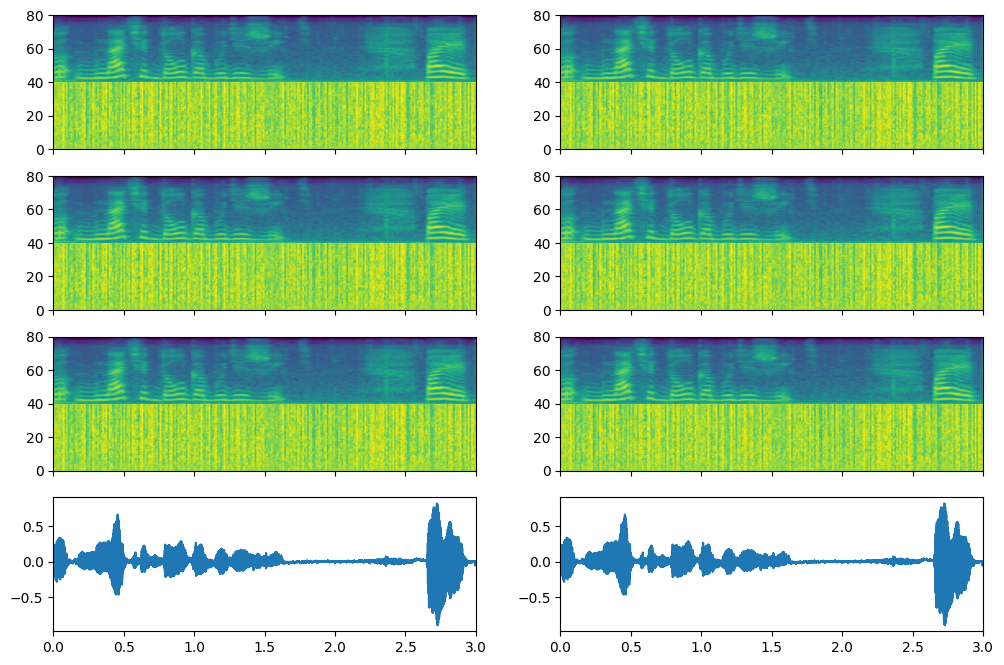

: 

In [ ]:
fig, AX = plt.subplots(4, 2, figsize = (12, 8), sharex=True, sharey=False)
for i in range(2):
    AX[0, i].imshow(mel[0].detach().cpu(), aspect="auto", origin='lower', extent = [0, 3.0, 0, 80])
    AX[1, i].imshow(mel[0].detach().cpu(), aspect="auto", origin='lower', extent = [0, 3.0, 0, 80])
    AX[2, i].imshow(mel[0].detach().cpu(), aspect="auto", origin='lower', extent = [0, 3.0, 0, 80])
    AX[3, i].plot(np.linspace(0, 3.0, d["audio"][0, 0].shape[-1]), d["audio"][0, 0])
